<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 3 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online. 

**HINT: There are more datasets available on the Gapminder website**

* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Coding Challenge step.1 -> Manually calculate Standard Deviation
def calculate_mean(numbers):
    total_sum = sum(numbers)
    count = len(numbers)
    return total_sum / count 
input_value = [2, 5, 8, 1, 10] 
mean_value = calculate_mean(input_value)
print(f"The mean of the list is: {mean_value}") 

The mean of the list is: 5.2


In [3]:
# Coding Challenge step.2 -> Manually calculate Standard Deviation
def calculate_standard_deviation(input_value, mean):
    squared_differences = 0
    count = 0
    for value in data:
        squared_differences += (value - mean) ** 2
        count += 1
    variance = squared_differences / count
    standard_deviation = variance ** 0.5
    return standard_deviation

data = [1, 2, 3, 4, 5]
mean_value = calculate_mean(data)
std_dev_value = calculate_standard_deviation(data, mean_value)

print("Mean:", mean_value)
print("Standard Deviation:", std_dev_value)

Mean: 3.0
Standard Deviation: 1.4142135623730951


In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [5]:
#Load the datasets
#1.Population dataset contains country wise population
#2.gni_per_capita dataset contains country wise gni data
#3.Life Expectancy dataset contains country wise population
gni = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv', index_col=0)
life=pd.read_csv('../data/life_expectancy.csv', index_col=0) 
population=pd.read_csv('../data/population.csv', index_col=0) 
gni.columns = gni.columns.astype(int)
life.columns = life.columns.astype(int)
population.columns = population.columns.astype(int)

In [6]:
#Check columns information
population.columns

Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64', length=301)

In [7]:
#information of dataset
life.info(),population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: float64(301)
memory usage: 460.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Columns: 301 entries, 1800 to 2100
dtypes: object(301)
memory usage: 464.8+ KB


(None, None)

In [8]:

#view sample data
gni.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,537.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,763.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,819.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [9]:
#view sample data
population.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [10]:
#view number of items
print(life.shape)
print(gni.shape)
print(population.shape)

(195, 301)
(191, 251)
(197, 301)


In [11]:
gni.columns

Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       ...
       2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
      dtype='int64', length=251)

In [12]:
life.columns

Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64', length=301)

In [13]:
population.columns

Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64', length=301)

In [14]:
#modifying index
gni.index.name = 'country'
life.index.name = 'country'
population.index.name = 'country'


In [15]:
population.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [16]:
population.dtypes

1800    object
1801    object
1802    object
1803    object
1804    object
         ...  
2096    object
2097    object
2098    object
2099    object
2100    object
Length: 301, dtype: object

In [17]:
#resetting index
gni = gni.reset_index()
life = life.reset_index()
population = population.reset_index()

In [18]:
gni = gni.melt(id_vars='country', var_name='year', value_name='gni_per_capita')
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
population = population.melt(id_vars='country', var_name='year', value_name='population')

In [19]:
#checking data after index reset
life.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Angola,1800,27.0
2,Albania,1800,35.4
3,Andorra,1800,NaN
4,United Arab Emirates,1800,30.7


In [20]:
print(population.head())
print(population.columns)

                country  year population
0           Afghanistan  1800      3.28M
1                Angola  1800      1.57M
2               Albania  1800       400k
3               Andorra  1800       2650
4  United Arab Emirates  1800      40.2k
Index(['country', 'year', 'population'], dtype='object')


In [21]:
life.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Angola,1800,27.0
2,Albania,1800,35.4
3,Andorra,1800,NaN
4,United Arab Emirates,1800,30.7


In [22]:
population.head()

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k


In [23]:
#merge dataset gni and population
df=pd.merge(gni,population,how='left',on=('country','year'))

In [24]:
df.head()

,country,year,gni_per_capita,population
0,Afghanistan,1800,207.0,3.28M
1,Angola,1800,517.0,1.57M
2,Albania,1800,207.0,400k
3,United Arab Emirates,1800,738.0,40.2k
4,Argentina,1800,794.0,534k


In [25]:
#merge dataset life data along with population and life expectancy
df=pd.merge(df,life,how='left',on=('country','year'))

In [26]:
df.head(10)

,country,year,gni_per_capita,population,life_expectancy
0,Afghanistan,1800,207.0,3.28M,28.2
1,Angola,1800,517.0,1.57M,27.0
2,Albania,1800,207.0,400k,35.4
3,United Arab Emirates,1800,738.0,40.2k,30.7
4,Argentina,1800,794.0,534k,33.2
5,Armenia,1800,111.0,413k,34.0
6,Antigua and Barbuda,1800,650.0,37k,33.5
7,Australia,1800,763.0,200k,34.0
8,Austria,1800,1940.0,3M,34.4
9,Azerbaijan,1800,33.0,880k,29.2


In [27]:
df.shape

(47941, 5)

In [28]:
df.dropna(inplace=True)

In [29]:
df

,country,year,gni_per_capita,population,life_expectancy
0,Afghanistan,1800,207.0,3.28M,28.2
1,Angola,1800,517.0,1.57M,27.0
2,Albania,1800,207.0,400k,35.4
3,United Arab Emirates,1800,738.0,40.2k,30.7
4,Argentina,1800,794.0,534k,33.2
...,...,...,...,...,...
47936,Samoa,2050,6440,320k,74.3
47937,Yemen,2050,1730,55.3M,72.2
47938,South Africa,2050,9220,73.5M,70.9
47939,Zambia,2050,1520,37.5M,69.8


In [30]:
df.dtypes

country             object
year                object
gni_per_capita      object
population          object
life_expectancy    float64
dtype: object

In [31]:
#converting year datatype
df['year'] = pd.to_numeric(df['year'])


In [32]:
#converting gdp values
def convert_gdp_to_float(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        if 'T' in value:
            return float(value.replace('T', '').strip()) * 1e12
        elif 'B' in value:
            return float(value.replace('B', '').strip()) * 1e9
        elif 'M' in value:
            return float(value.replace('M', '').strip()) * 1e6
        elif 'k' in value:
            return float(value.replace('k', '').strip()) * 1e3
        else:
            return float(value) 
    return value
    
    




In [33]:
#call the function
df['gni_per_capita'] = df['gni_per_capita'].apply(convert_gdp_to_float)

print(df)
df.dtypes

                    country  year  gni_per_capita population  life_expectancy
0               Afghanistan  1800           207.0      3.28M             28.2
1                    Angola  1800           517.0      1.57M             27.0
2                   Albania  1800           207.0       400k             35.4
3      United Arab Emirates  1800           738.0      40.2k             30.7
4                 Argentina  1800           794.0       534k             33.2
...                     ...   ...             ...        ...              ...
47936                 Samoa  2050          6440.0       320k             74.3
47937                 Yemen  2050          1730.0      55.3M             72.2
47938          South Africa  2050          9220.0      73.5M             70.9
47939                Zambia  2050          1520.0      37.5M             69.8
47940              Zimbabwe  2050          1880.0      26.4M             67.6

[46604 rows x 5 columns]


country             object
year                 int64
gni_per_capita     float64
population          object
life_expectancy    float64
dtype: object

In [34]:
#converting population
def convert_population_to_float(value):
    if isinstance(value, str):
        value = value.replace(',', '')
        if 'T' in value:
            return float(value.replace('T', '').strip()) * 1e12
        elif 'B' in value:
            return float(value.replace('B', '').strip()) * 1e9
        elif 'M' in value:
            return float(value.replace('M', '').strip()) * 1e6
        elif 'k' in value:
            return float(value.replace('k', '').strip()) * 1e3
        else:
            return float(value) 
    return value
 

In [35]:
#call the function
df['population'] = df['population'].apply(convert_population_to_float)
print(df)
df.dtypes

                    country  year  gni_per_capita  population  life_expectancy
0               Afghanistan  1800           207.0   3280000.0             28.2
1                    Angola  1800           517.0   1570000.0             27.0
2                   Albania  1800           207.0    400000.0             35.4
3      United Arab Emirates  1800           738.0     40200.0             30.7
4                 Argentina  1800           794.0    534000.0             33.2
...                     ...   ...             ...         ...              ...
47936                 Samoa  2050          6440.0    320000.0             74.3
47937                 Yemen  2050          1730.0  55300000.0             72.2
47938          South Africa  2050          9220.0  73500000.0             70.9
47939                Zambia  2050          1520.0  37500000.0             69.8
47940              Zimbabwe  2050          1880.0  26400000.0             67.6

[46604 rows x 5 columns]


country             object
year                 int64
gni_per_capita     float64
population         float64
life_expectancy    float64
dtype: object

In [36]:
# Determine the start and end year based on the year range you want to investigate
start_year = 2001
end_year = 2031

In [37]:
#selecting year range 2001 to 2030
df = df[(df['year'] >= start_year) & (df['year'] < end_year)]
df.head(-5)
df.dtypes


country             object
year                 int64
gni_per_capita     float64
population         float64
life_expectancy    float64
dtype: object

*All libraries used should be added here*

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [38]:
#select only 10 countries for analysis
filtered_df = df[df['country'].isin(['Canada', 'China', 'Australia', 'Germany', 'Japan', 'South Africa', 'United States', 'United Kingdom', 'India', 'Brazil'])]
filtered_df



,country,year,gni_per_capita,population,life_expectancy
38398,Australia,2001,29600.0,1.920000e+07,80.1
38413,Brazil,2001,4920.0,1.780000e+08,71.5
38419,Canada,2001,33800.0,3.100000e+07,79.6
38422,China,2001,1480.0,1.270000e+09,71.7
38434,Germany,2001,36300.0,8.150000e+07,78.7
...,...,...,...,...,...
43990,United Kingdom,2030,48400.0,6.920000e+07,82.7
44007,India,2030,3410.0,1.510000e+09,73.0
44016,Japan,2030,47600.0,1.190000e+08,86.1
44110,United States,2030,76900.0,3.520000e+08,80.5


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|This is an example| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [39]:
#Code:
df.columns
df.head()

,country,year,gni_per_capita,population,life_expectancy
38391,Afghanistan,2001,173.0,19700000.0,54.8
38392,Angola,2001,573.0,16900000.0,53.4
38393,Albania,2001,1880.0,3150000.0,76.0
38394,United Arab Emirates,2001,47000.0,3450000.0,69.2
38395,Argentina,2001,10300.0,37500000.0,74.3


**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

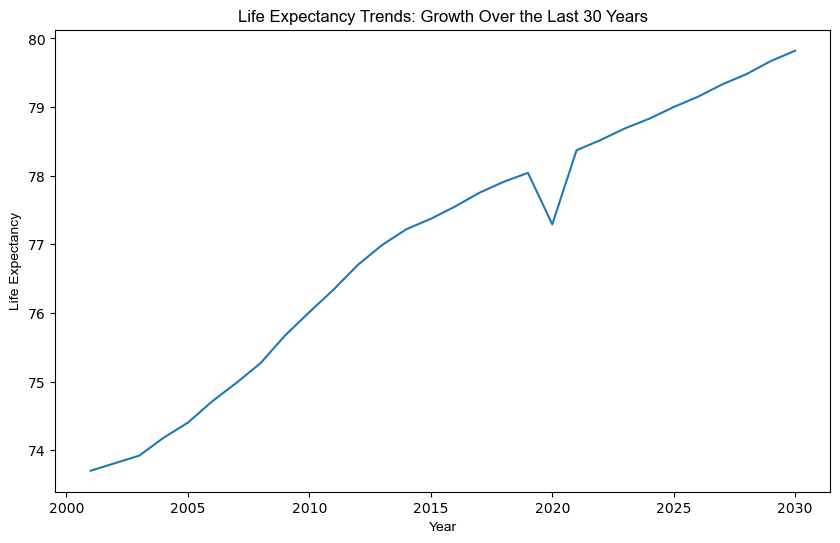

In [40]:
#Life expectancy over the time
mean_life_expectance = filtered_df.groupby('year')['life_expectancy'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_life_expectance)
plt.title('Life Expectancy Trends: Growth Over the Last 30 Years', fontname='Arial')
plt.xlabel('Year', fontname='Arial')
plt.ylabel('Life Expectancy',fontname='Arial')
plt.show()
#Life expectancy data shows over the time life expectancy increases and 
#we may notice slight down fall around 2020 it may be due to pandemic for all the selected countries

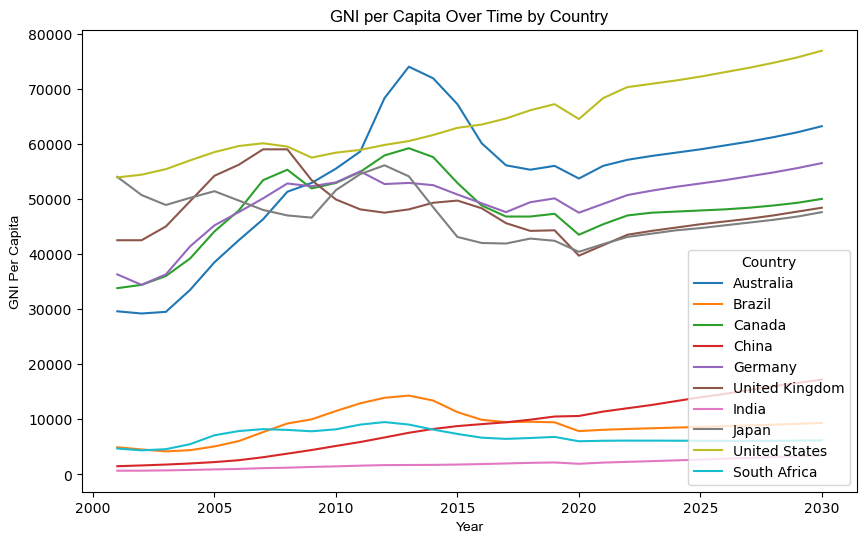

In [41]:
#gni data year wise
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='gni_per_capita', hue='country')
plt.title('GNI per Capita Over Time by Country',fontname='Arial')
plt.xlabel('Year',fontname='Arial')
plt.ylabel('GNI Per Capita',fontname='Arial')
plt.legend(title='Country')
plt.show()
#gni data shows country increase in gdp for most countries and 
#slightly low gdp in 2020 and it may be due to pandemic covid breakdown
#research about australia and covid breakdown

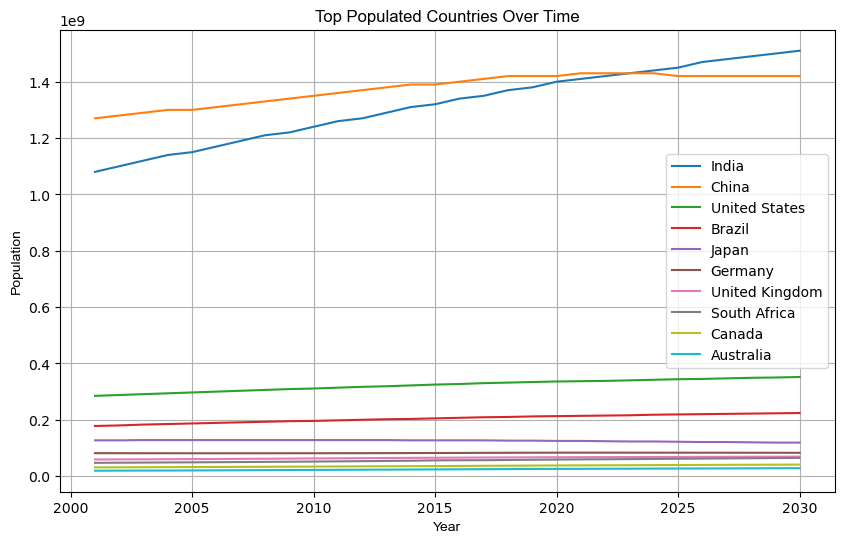

In [42]:
#selected 10 countries for our analysis for 30 years from 2001 to 2030
filtered_df = df[df['country'].isin(['Canada', 'China', 'Australia', 'Germany', 'Japan', 'South Africa', 'United States', 'United Kingdom', 'India', 'Brazil'])]
filtered_df

filtered_df_pivot = filtered_df.pivot(index='country', columns='year', values='population')

filtered_df_pivot = filtered_df_pivot.sort_values(by=filtered_df_pivot.columns[-1], ascending=False)

plt.figure(figsize=(10, 6))

for country in filtered_df_pivot.index:
    plt.plot(filtered_df_pivot.columns, filtered_df_pivot.loc[country], label=country)

plt.xlabel('Year',fontname='Arial')
plt.ylabel('Population',fontname='Arial')
plt.title('Top Populated Countries Over Time',fontname='Arial')
plt.legend()
plt.grid(True)
plt.show()
#Population graph shows steep increase in population in India and China over last 30 years


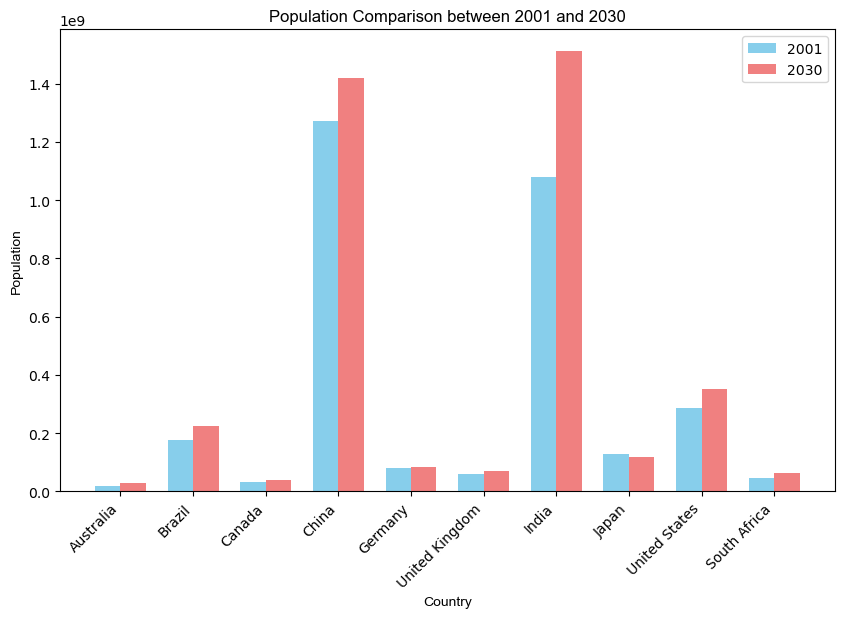

In [43]:
#compare population data for 2001 vs. 2030
year1 = 2001
year2 = 2030
data_year1 = filtered_df[filtered_df['year'] == year1]
data_year2 = filtered_df[filtered_df['year'] == year2]

merged_data = pd.merge(data_year1, data_year2, on='country', suffixes=('_' + str(year1), '_' + str(year2)))

plt.figure(figsize=(10, 6))
bar_width = 0.35

r1 = range(len(merged_data['country']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, merged_data['population_' + str(year1)],  width=bar_width, label=year1,color='skyblue')
plt.bar(r2, merged_data['population_' + str(year2)],  width=bar_width, label=year2,color='lightcoral')

plt.xlabel('Country', fontname='Arial')
plt.xticks([r + bar_width/2 for r in range(len(merged_data['country']))], merged_data['country'])
plt.ylabel('Population', fontname='Arial')
plt.title(f'Population Comparison between {year1} and {year2}', fontname='Arial')
plt.legend()
plt.xticks(rotation=45,ha='right')
plt.show()
#chart shows India population is steeply raising.


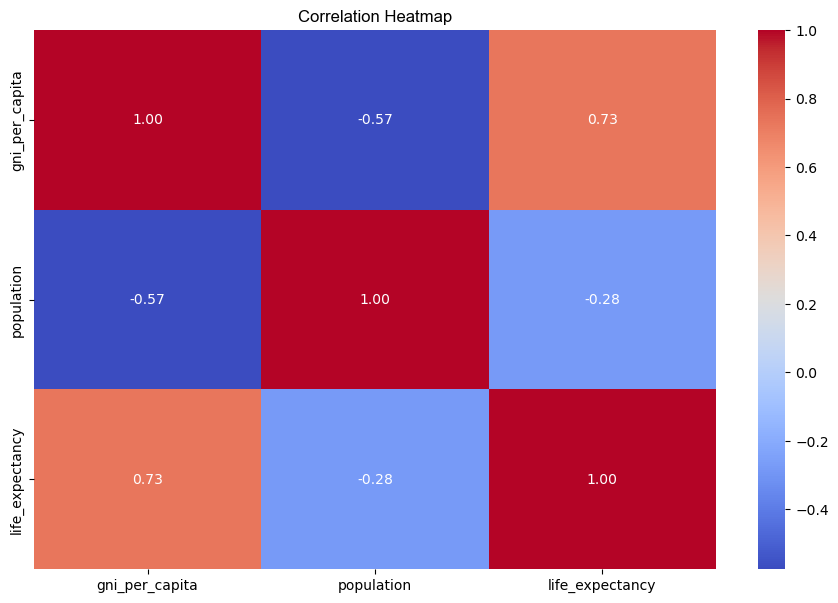

In [44]:
#Visualize the correlation between GNI, population, and life expectancy.
corr = filtered_df[['gni_per_capita', 'population', 'life_expectancy']].corr()
plt.figure(figsize=(11, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap',fontname='Arial')
plt.show()
#Can we draw any conclutions?
#The higher population gives low gni per capita and shows negative correlation and high polulation gives negative life expectancy
#Whereas the higher GNA Per capita corresponds to a higher life expectancy. In other words, there is a positive correlation.

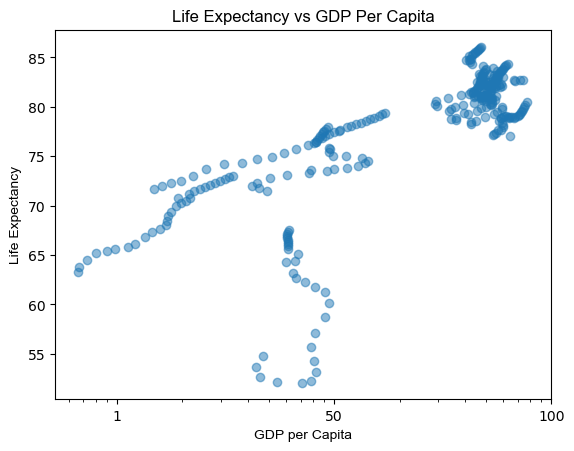

In [45]:
#This plot shows life expectancy vs GNI per capita with the size of the bubbles representing population.
plt.scatter(filtered_df['gni_per_capita'], filtered_df['life_expectancy'], alpha=0.5)
plt.xscale('log')
plt.title('Life Expectancy vs GDP Per Capita',fontname='Arial')
plt.xlabel('GDP per Capita',fontname='Arial')
plt.ylabel('Life Expectancy',fontname='Arial')
plt.xticks([1000, 10000, 100000],['1', '50', '100'])
plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

**Don't forget to create your README!**

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!

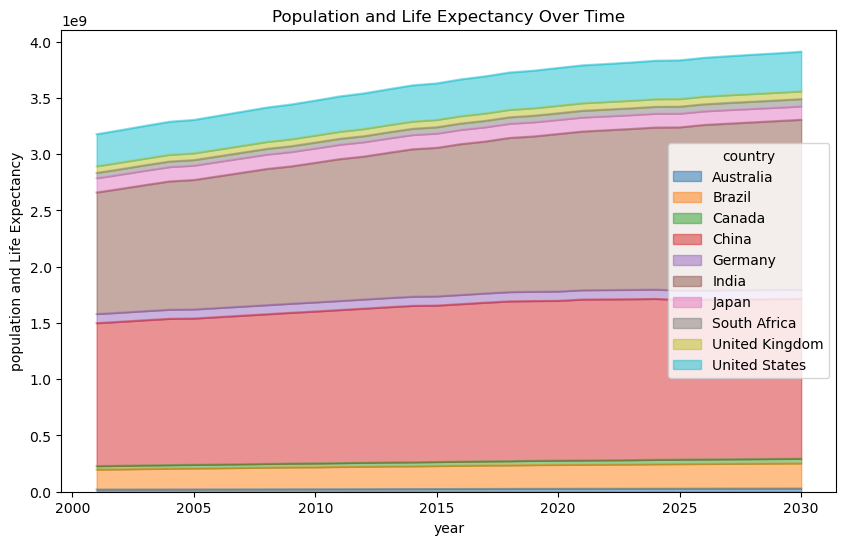

In [62]:
#selected countries to display population and life expectancy
df_pivot = filtered_df.pivot_table(index='year', columns='country', values=['population', 'life_expectancy'])
df_pivot['population'].plot.area(figsize=(10, 6), alpha=0.5)
plt.title('Population and Life Expectancy Over Time')
plt.ylabel('population and Life Expectancy')
plt.show()

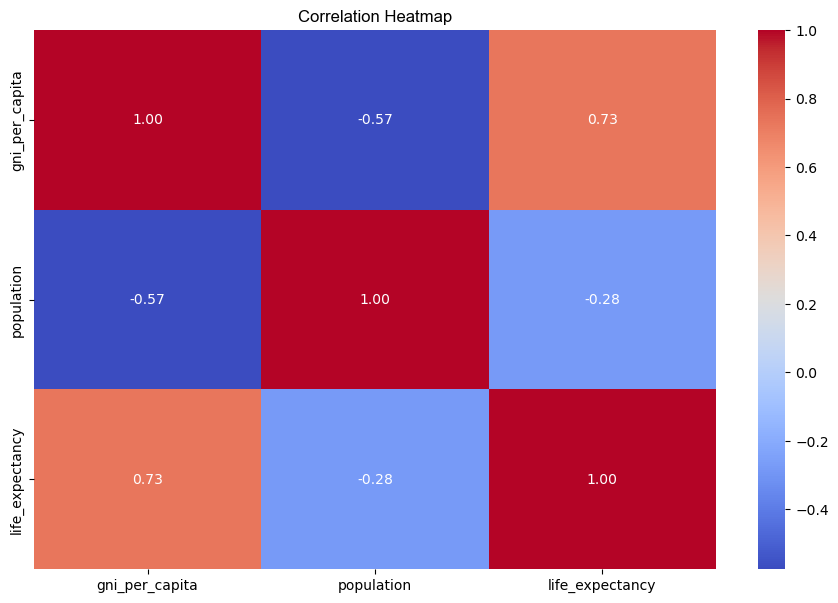

In [47]:
#Visualize the correlation between GNI, population, and life expectancy.
corr = filtered_df[['gni_per_capita', 'population', 'life_expectancy']].corr()
plt.figure(figsize=(11, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap',fontname='Arial')
plt.show()
#Can we draw any conclutions?
#The higher population gives low gni per capita and shows negative correlation and high polulation gives negative life expectancy
#Whereas the higher GNA Per capita corresponds to a higher life expectancy. In other words, there is a positive correlation.

In [48]:
# Calculations to check the data analyis. Which year in this 30 years has the highest gdp 
#Group by year to calculate total GDP

gdp_by_year = filtered_df.groupby('year')['gni_per_capita'].sum()

highest_gdp_year = gdp_by_year.idxmax() 

print(f"Year with highest GDP: {highest_gdp_year}") 



Year with highest GDP: 2013


In [49]:
# Which year in this 30 years has the highest population
#Group by year to calculate total population
gdp_by_year = filtered_df.groupby('year')['population'].sum()

highest_population_year = gdp_by_year.idxmax() 

print(f"Year with highest population: {highest_population_year}") 

Year with highest population: 2030


In [50]:
# Which year in this 30 years has the highest population
#Group by year to calculate total population
gdp_by_year = filtered_df.groupby('year')['life_expectancy'].sum()

highest_life_expectancy_year = gdp_by_year.idxmax() 

print(f"Year with highest population: {highest_life_expectancy_year}") 

Year with highest population: 2030


In [51]:
gni_2030 = filtered_df[filtered_df['year'] == 2030]['gni_per_capita'].max()

print(f"GNI per capita for 2030: ${gni_2030:,.2f}")

GNI per capita for 2030: $76,900.00


In [52]:
gni_2013 = filtered_df[filtered_df['year'] == 2013]['gni_per_capita'].max()

print(f"GNI per capita for 2013: ${gni_2013:,.2f}")

GNI per capita for 2013: $74,000.00


In [53]:
df_filtered = df[(df['year'] >= 2001) & (df['year'] <= 2030)]

# Find the maximum GNI per capita in the range
max_gni_row = df_filtered[df_filtered['gni_per_capita'] == df_filtered['gni_per_capita'].max()]

max_year = max_gni_row['year'].values[0]
max_gni = max_gni_row['gni_per_capita'].values[0]

print(f"Year with highest GNI per capita: {max_year}, GNI per capita: ${max_gni:,.2f}")

Year with highest GNI per capita: 2013, GNI per capita: $117,000.00


In [54]:
#Gni for year 2030 is less than 2013
gni_2030 = df[df['year'] == 2030]['gni_per_capita'].max()

print(f"GNI per capita for 2030: ${gni_2030:,.2f}")

GNI per capita for 2030: $93,900.00


In [55]:
#The projected lower GNI per capita in 2030 compared to 2013 is likely due to slower economic growth, higher population growth and may global economic challenges.
#

In [56]:
#decline in GNI may be due to high population and economy changes, but life expectancy continues to rise because of other factors and it needs more analysis on other datasources

In [57]:
filtered_df.to_csv('filtered_df.csv')
filtered_df.to_csv('../data/filterd_df.csv')

In [58]:
filtered_df.dtypes

country             object
year                 int64
gni_per_capita     float64
population         float64
life_expectancy    float64
dtype: object

In [59]:
df.head()

,country,year,gni_per_capita,population,life_expectancy
38391,Afghanistan,2001,173.0,19700000.0,54.8
38392,Angola,2001,573.0,16900000.0,53.4
38393,Albania,2001,1880.0,3150000.0,76.0
38394,United Arab Emirates,2001,47000.0,3450000.0,69.2
38395,Argentina,2001,10300.0,37500000.0,74.3


In [60]:
'''
Findings:

Deeper Analysis of Life expectancy data shows over the years from 2001 to 2030 life expectancy increases and there is slight down fall in life expectancy in the year 2020,2021 and it shows life expectancy decreased due to COVID 19 breakdown irrespective of countries.

Similar trends can also be seen in GNI Per Capita as well and the reduction is due to the economic slowdown and major shut down. The graph highlights a steep increase in Australia GNI per Capita for the period between 2010 and 2014 and may be due to strong mining exports and global economic stabilization.

Population graph shows steep increase in population in India and China over last 30 years and India’s population will be projected to be top.

Finally when correlating between GNI Per Capita, Life Expectancy and Population there are few interested observations:

High population vs low GNI per capita shows negative correlation

High population vs low life expectancy shows negative life expectancy

Whereas the higher GNA Per capita corresponds to a higher life expectancy. In other words, there is a positive correlation.
'''

'\nFindings:\n\nDeeper Analysis of Life expectancy data shows over the years from 2001 to 2030 life expectancy increases and there is slight down fall in life expectancy in the year 2020,2021 and it shows life expectancy decreased due to COVID 19 breakdown irrespective of countries.\n\nSimilar trends can also be seen in GNI Per Capita as well and the reduction is due to the economic slowdown and major shut down. The graph highlights a steep increase in Australia GNI per Capita for the period between 2010 and 2014 and may be due to strong mining exports and global economic stabilization.\n\nPopulation graph shows steep increase in population in India and China over last 30 years and India’s population will be projected to be top.\n\nFinally when correlating between GNI Per Capita, Life Expectancy and Population there are few interested observations:\n\nHigh population vs low GNI per capita shows negative correlation\n\nHigh population vs low life expectancy shows negative life expectanc

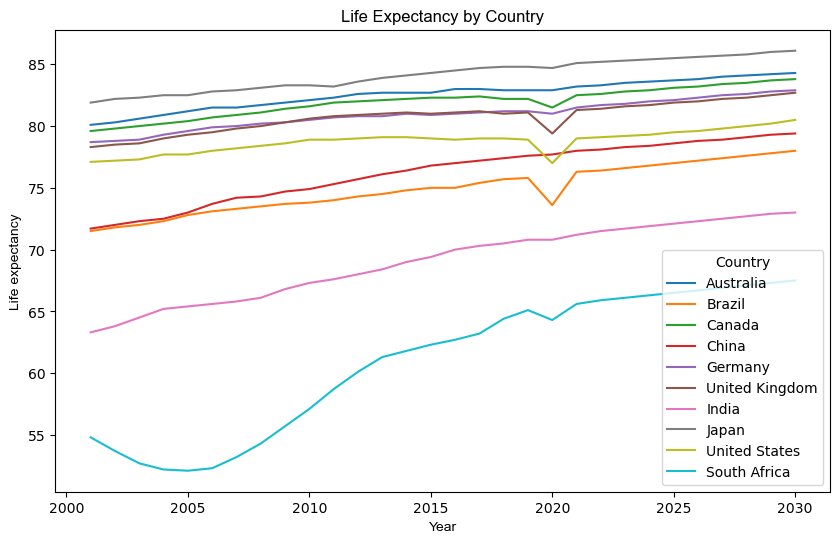

In [61]:
#gni data year wise
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='life_expectancy', hue='country')
plt.title('Life Expectancy by Country',fontname='Arial')
plt.xlabel('Year',fontname='Arial')
plt.ylabel('Life expectancy',fontname='Arial')
plt.legend(title='Country')
plt.show()
#gni data shows country increase in gdp for most countries and 
#slightly low gdp in 2020 and it may be due to pandemic covid breakdown
#research about australia and covid breakdown